,ray1,ray2,ray3,ray4,ray5,kartx,karty,kartz,time,action
0,-1.000000,6.520963,4.611085,6.489805,4.588916,15.98892,0.264488,3.105164,0.100632,ACCELERATE
1,-1.000000,6.520926,4.611081,6.489840,4.588920,15.98892,0.273206,3.105036,0.208055,ACCELERATE
2,-1.000000,6.520916,4.611076,6.489851,4.588925,15.98892,0.275302,3.105015,0.311390,ACCELERATE
3,-1.000000,6.520908,4.611072,6.489858,4.588930,15.98893,0.275676,3.105012,0.401621,ACCELERATE
4,-1.000000,6.520902,4.611067,6.489865,4.588934,15.98893,0.275743,3.105016,0.500187,ACCELERATE
...,...,...,...,...,...,...,...,...,...,...
1416,0.928427,0.835753,1.547613,2.534083,-1.000000,14.98860,0.296702,52.120530,46.001270,ACCELERATE
1417,0.925835,0.842288,1.556550,2.542170,-1.000000,14.44852,0.295907,52.790040,46.100030,ACCELERATE
1418,0.923708,0.840380,1.557029,2.545754,-1.000000,13.86868,0.295823,53.455730,46.200100,ACCELERATE
1419,0.921134,0.836330,1.560062,2.510900,-1.000000,13.24070,0.296903,54.118750,46.302360,ACCELERATE


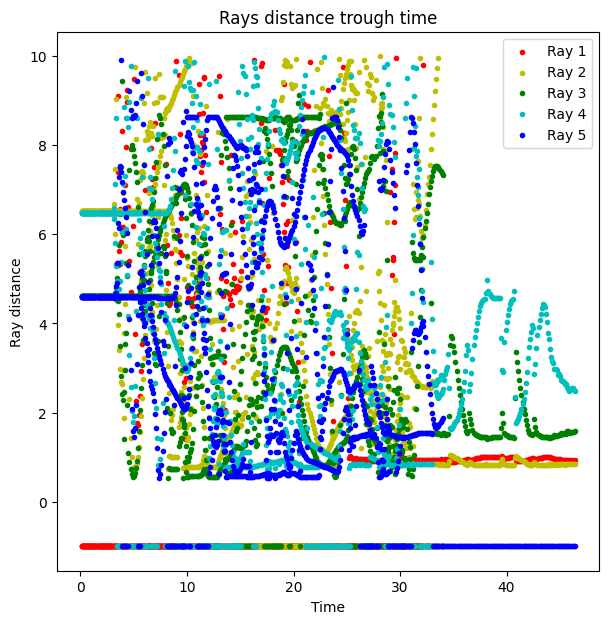

In [119]:
from ann import cost, cost_regL2, backprop, backprop2, predict, feedForward
from Utils import ExportONNX_JSON_TO_Custom, ExportAllformatsMLPSKlearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os

#Colormaps https://matplotlib.org/stable/users/explain/colors/colormaps.html#references

#Nota: para calcular la precision del modelo vamos a redondear la salida, pues nos
#interesa saber que el modelo gira a la derecha, no que esta 95% seguro de girar a la derecha

#Ejercicio 2
kartData = pd.DataFrame()

trainFiles = len(os.listdir('AAKart/ML/'))
for i in range(trainFiles):
    newKartData = pd.read_csv(f'AAKart/ML/Kart{i:02d}.csv')
    
    kartData = pd.concat([kartData, newKartData], axis=0, ignore_index=True)

display(kartData)

#Tabla posicion 2D a traves del tiempo
positionThroughTime = px.scatter_3d(kartData, x='kartx', y='kartz', z='time', color='action', 
                                    color_discrete_sequence=px.colors.qualitative.Set1)
positionThroughTime.update_traces(marker_size = 3)

positionThroughTime.update_layout(scene=dict(xaxis_title='Kart X', yaxis_title='Kart Z', zaxis_title='Time'))
positionThroughTime.update_layout(legend_title='Action')
positionThroughTime.update_layout(title='Kart 2D position through time')

positionThroughTime.show()

#Distancia de los rayos a traves del tiempo
plt.figure(figsize=(7, 7))
plt.scatter(kartData['time'], kartData['ray1'], c='r', marker='.', label="Ray 1")
plt.scatter(kartData['time'], kartData['ray2'], c='y', marker='.', label="Ray 2")
plt.scatter(kartData['time'], kartData['ray3'], c='g', marker='.', label="Ray 3")
plt.scatter(kartData['time'], kartData['ray4'], c='c', marker='.', label="Ray 4")
plt.scatter(kartData['time'], kartData['ray5'], c='b', marker='.', label="Ray 5")
plt.xlabel('Time')
plt.ylabel('Ray distance')
plt.legend()
plt.title('Rays distance trough time')
plt.show()

,ray1,ray2,ray3,ray4,ray5,kartx,kartz,action
0,1.000000,0.624499,0.458187,0.622511,0.431888,15.98892,3.105164,ACCELERATE
1,1.000000,0.624495,0.458186,0.622515,0.431888,15.98892,3.105036,ACCELERATE
2,1.000000,0.624494,0.458186,0.622516,0.431889,15.98892,3.105015,ACCELERATE
3,1.000000,0.624493,0.458185,0.622517,0.431889,15.98893,3.105012,ACCELERATE
4,1.000000,0.624492,0.458185,0.622518,0.431890,15.98893,3.105016,ACCELERATE
...,...,...,...,...,...,...,...,...
1416,0.003245,0.010766,0.114093,0.193966,1.000000,14.98860,52.120530,ACCELERATE
1417,0.002959,0.011471,0.115097,0.194842,1.000000,14.44852,52.790040,ACCELERATE
1418,0.002724,0.011265,0.115151,0.195231,1.000000,13.86868,53.455730,ACCELERATE
1419,0.002440,0.010828,0.115492,0.191455,1.000000,13.24070,54.118750,ACCELERATE


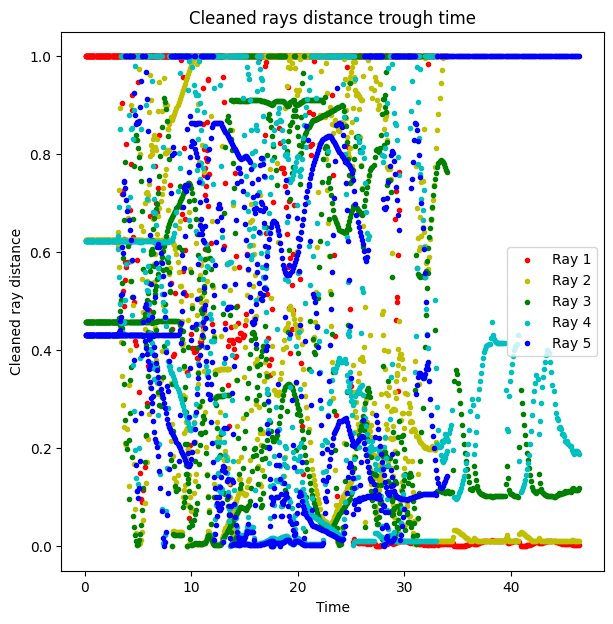

In [120]:
from sklearn.preprocessing import MinMaxScaler

#Ejercicio 3

#Kart y y time son inutiles para el modelo
cleanKartData = kartData.drop(columns=['karty', 'time'])

#Normalizar distancia de obstaculos en cada rayo
scaler = MinMaxScaler()

columnsToNormalize = ['ray1', 'ray2', 'ray3', 'ray4', 'ray5']

for column in columnsToNormalize:
    mask = (kartData[column] != -1)
    cleanKartData.loc[mask, column] = scaler.fit_transform(cleanKartData.loc[mask, [column]])
    
    #Si no hemos chocado con nada, significa que "no hay peligro", es decir, que tenemos la distancia del rayo segura
    invalidMask = (kartData[column] == -1)
    cleanKartData.loc[invalidMask, column] = 1

display(cleanKartData)

#Distancia limpia de los rayos a traves del tiempo
plt.figure(figsize=(7, 7))
plt.scatter(kartData['time'], cleanKartData['ray1'], c='r', marker='.', label="Ray 1")
plt.scatter(kartData['time'], cleanKartData['ray2'], c='y', marker='.', label="Ray 2")
plt.scatter(kartData['time'], cleanKartData['ray3'], c='g', marker='.', label="Ray 3")
plt.scatter(kartData['time'], cleanKartData['ray4'], c='c', marker='.', label="Ray 4")
plt.scatter(kartData['time'], cleanKartData['ray5'], c='b', marker='.', label="Ray 5")
plt.xlabel('Time')
plt.ylabel('Cleaned ray distance')
plt.legend()
plt.title('Cleaned rays distance trough time')
plt.show()

#Exportamos cleanKartData a Unity. Allí se programará el feedforward.

In [122]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Ejercicio 4

#El modelo predice la action mas probable que haría el jugador grabado en kartData
encoder = OneHotEncoder(sparse_output=False)

X = cleanKartData.drop(columns=['action'])
y = encoder.fit_transform(cleanKartData[['action']])

#Separación de datos de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

#Número de neuronas de cada capa. Experimentar con el número de neuronas y de capas para conseguir un mejor resultado
#A mayor número de capas, mejor capacidad para aprender representaciones jerárquicas y características abstractas de los datos.
#A mayor número de neuronas, mejor capacidad para aprender representaciones más complejas de los datos.
#Sin embargo, al aumentar estos números, puede aumentar el riesgo de sobreajuste, 
#especialmente si no hay suficientes datos de entrenamiento.
layer_sizes = [X.shape[1], 10, 10, len(kartData['action'].unique())]
epsilon = 0.12
theta_list = []

for i in range(len(layer_sizes) - 1):
    theta_list.append(np.random.rand(layer_sizes[i + 1], layer_sizes[i] + 1) * 2 * epsilon - epsilon)

iterations = 1000
lambda_ = 1
alpha = 1

#Perceptrón
for i in range(iterations):
    cost, grads = backprop(theta_list, X_train, y_train, lambda_)

    for j in range(len(theta_list)):
        theta_list[j] -= alpha * grads[j]
        
predictions = predict(theta_list, X_test)
accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
print(f'Precisión del perceptrón: {accuracy:.3f}')

#MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=layer_sizes[1:-2], max_iter=iterations, alpha=alpha, learning_rate_init=lambda_, random_state=8)
mlp_classifier.fit(X_train, np.argmax(y_train, axis=1))

predictions = mlp_classifier.predict(X_test)

accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
print(f'Precisión de MLP Classifier: {accuracy:.3f}. Activation = \'relu\', Learning_rate = \'constant\'')

#MLP Classifier ajustada
mlp_classifier = MLPClassifier(hidden_layer_sizes=layer_sizes[1:-2], activation='logistic', learning_rate='adaptive', max_iter=iterations, alpha=alpha, learning_rate_init=lambda_, random_state=8)
mlp_classifier.fit(X_train, np.argmax(y_train, axis=1))

predictions = mlp_classifier.predict(X_test)

accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
print(f'Precisión de MLP Classifier: {accuracy:.3f}. Activation = \'logistic\', Learning_rate = \'adaptive\'')

#MLP Classifier ajustada
mlp_classifier = MLPClassifier(hidden_layer_sizes=layer_sizes[1:-2], activation='tanh', learning_rate='invscaling', max_iter=iterations, alpha=alpha, learning_rate_init=lambda_, random_state=8)
mlp_classifier.fit(X_train, np.argmax(y_train, axis=1))

predictions = mlp_classifier.predict(X_test)

accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
print(f'Precisión de MLP Classifier: {accuracy:.3f}. Activation = \'tanh\', Learning_rate = \'invscaling\'')

Precisión del perceptrón: 0.424
Precisión de MLP Classifier: 0.419. Activation = 'relu', Learning_rate = 'constant'
Precisión de MLP Classifier: 0.385. Activation = 'logistic', Learning_rate = 'adaptive'
Precisión de MLP Classifier: 0.360. Activation = 'tanh', Learning_rate = 'invscaling'
